**Analisis Efisiensi Algoritma Iteratif dan Rekursif dalam Menghitung Bilangan Fibonacci**

Aditya Dwi Aryanto | 103132400027

Khairun Fahmi | 103132400034

Fauzi Romadhoni |103132400025

**Import Library**

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

**Algoritma**

In [ ]:
# ========== IMPLEMENTASI ALGORITMA ==========

def fibonacci_iteratif(n):
    """
    Menghitung bilangan Fibonacci ke-n menggunakan pendekatan iteratif
    Kompleksitas Waktu: O(n)
    Kompleksitas Ruang: O(1)
    """
    if n <= 1:
        return n

    a, b = 0, 1
    for i in range(2, n + 1):
        a, b = b, a + b

    return b


def fibonacci_rekursif(n):
    """
    Menghitung bilangan Fibonacci ke-n menggunakan pendekatan rekursif
    Kompleksitas Waktu: O(2^n)
    Kompleksitas Ruang: O(n)
    """
    if n <= 1:
        return n

    return fibonacci_rekursif(n - 1) + fibonacci_rekursif(n - 2)

**Mengukur Waktu**

In [ ]:
# ========== FUNGSI PENGUKURAN WAKTU ==========

def ukur_waktu_iteratif(n, jumlah_percobaan=5):
    """
    Mengukur waktu eksekusi rata-rata algoritma iteratif
    """
    total_waktu = 0
    hasil = 0

    for _ in range(jumlah_percobaan):
        start_time = time.time()
        hasil = fibonacci_iteratif(n)
        end_time = time.time()
        total_waktu += (end_time - start_time)

    waktu_rata_rata = total_waktu / jumlah_percobaan
    return hasil, waktu_rata_rata


def ukur_waktu_rekursif(n, jumlah_percobaan=5):
    """
    Mengukur waktu eksekusi rata-rata algoritma rekursif
    """
    total_waktu = 0
    hasil = 0

    for _ in range(jumlah_percobaan):
        start_time = time.time()
        hasil = fibonacci_rekursif(n)
        end_time = time.time()
        total_waktu += (end_time - start_time)

    waktu_rata_rata = total_waktu / jumlah_percobaan
    return hasil, waktu_rata_rata


**Perbandingan**

In [ ]:
# ========== FUNGSI ANALISIS PERBANDINGAN ==========

def bandingkan_algoritma(nilai_n_list):
    """
    Membandingkan performa kedua algoritma untuk berbagai nilai n
    """
    hasil_iteratif = []
    waktu_iteratif = []
    hasil_rekursif = []
    waktu_rekursif = []

    print("=" * 70)
    print("MEMULAI ANALISIS PERBANDINGAN ALGORITMA")
    print("=" * 70)
    print()

    for n in nilai_n_list:
        print(f"Menghitung Fibonacci ke-{n}...")

        # Test Iteratif
        hasil_iter, waktu_iter = ukur_waktu_iteratif(n)
        hasil_iteratif.append(hasil_iter)
        waktu_iteratif.append(waktu_iter)
        print(f"  ✓ Iteratif: {waktu_iter:.6f} detik")

        # Test Rekursif (hanya untuk n kecil karena sangat lambat)
        if n <= 35:  # Batasan untuk menghindari waktu tunggu terlalu lama
            hasil_rek, waktu_rek = ukur_waktu_rekursif(n)
            hasil_rekursif.append(hasil_rek)
            waktu_rekursif.append(waktu_rek)
            print(f"  ✓ Rekursif: {waktu_rek:.6f} detik")
        else:
            hasil_rekursif.append(None)
            waktu_rekursif.append(None)
            print(f"  ⚠ Rekursif: Dilewati (terlalu lambat untuk n > 35)")

        print()

    return {
        'n': nilai_n_list,
        'hasil_iteratif': hasil_iteratif,
        'waktu_iteratif': waktu_iteratif,
        'hasil_rekursif': hasil_rekursif,
        'waktu_rekursif': waktu_rekursif
    }


**Visuaalisasi**

In [ ]:
# ========== FUNGSI VISUALISASI ==========

def tampilkan_tabel(data):
    """
    Menampilkan hasil dalam bentuk tabel
    """
    print("\n" + "=" * 70)
    print("TABEL HASIL PENGUKURAN WAKTU EKSEKUSI")
    print("=" * 70)
    print()

    table_data = []
    for i in range(len(data['n'])):
        n = data['n'][i]
        hasil_iter = data['hasil_iteratif'][i]
        waktu_iter = data['waktu_iteratif'][i]
        waktu_rek = data['waktu_rekursif'][i]

        if waktu_rek is not None:
            rasio = waktu_rek / waktu_iter if waktu_iter > 0 else 0
            table_data.append([
                n,
                hasil_iter,
                f"{waktu_iter:.6f}",
                f"{waktu_rek:.6f}",
                f"{rasio:.2f}x"
            ])
        else:
            table_data.append([
                n,
                hasil_iter,
                f"{waktu_iter:.6f}",
                "N/A",
                "N/A"
            ])

    headers = ["n", "Hasil Fibonacci", "Waktu Iteratif (s)", "Waktu Rekursif (s)", "Rasio"]
    print(tabulate(table_data, headers=headers, tablefmt="grid"))
    print()


def buat_grafik(data):
    n_values = data['n']
    waktu_iter = data['waktu_iteratif']
    waktu_rek = [w if w is not None else 0 for w in data['waktu_rekursif']]

    # Filter data rekursif yang valid
    n_rek_valid = [n for n, w in zip(n_values, data['waktu_rekursif']) if w is not None]
    waktu_rek_valid = [w for w in data['waktu_rekursif'] if w is not None]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Grafik 1: Perbandingan Linear Scale
    ax1.plot(n_values, waktu_iter, 'o-', label='Iteratif O(n)',
             color='blue', linewidth=2, markersize=8)
    ax1.plot(n_rek_valid, waktu_rek_valid, 's-', label='Rekursif O(2^n)',
             color='red', linewidth=2, markersize=8)
    ax1.set_xlabel('Nilai n (Bilangan Fibonacci ke-n)', fontsize=12)
    ax1.set_ylabel('Waktu Eksekusi (detik)', fontsize=12)
    ax1.set_title('Perbandingan Waktu Eksekusi\nAlgoritma Iteratif vs Rekursif',
                  fontsize=14, fontweight='bold')
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)

    # Grafik 2: Perbandingan Log Scale
    ax2.semilogy(n_values, waktu_iter, 'o-', label='Iteratif O(n)',
                 color='blue', linewidth=2, markersize=8)
    ax2.semilogy(n_rek_valid, waktu_rek_valid, 's-', label='Rekursif O(2^n)',
                 color='red', linewidth=2, markersize=8)
    ax2.set_xlabel('Nilai n (Bilangan Fibonacci ke-n)', fontsize=12)
    ax2.set_ylabel('Waktu Eksekusi (detik) - Skala Log', fontsize=12)
    ax2.set_title('Perbandingan Waktu Eksekusi (Skala Logaritmik)\nAlgoritma Iteratif vs Rekursif',
                  fontsize=14, fontweight='bold')
    ax2.legend(fontsize=11)
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


def tampilkan_analisis(data):

    print("\n" + "=" * 70)
    print("ANALISIS DAN KESIMPULAN")
    print("=" * 70)
    print()

    # Hitung perbedaan waktu untuk n tertentu
    n_contoh = 30
    idx = data['n'].index(n_contoh)
    waktu_iter = data['waktu_iteratif'][idx]
    waktu_rek = data['waktu_rekursif'][idx]

    if waktu_rek is not None:
        rasio = waktu_rek / waktu_iter
        print(f" Untuk n = {n_contoh}:")
        print(f"   - Waktu Iteratif  : {waktu_iter:.6f} detik")
        print(f"   - Waktu Rekursif  : {waktu_rek:.6f} detik")
        print(f"   - Algoritma rekursif {rasio:.0f}x LEBIH LAMBAT dari iteratif!")
        print()

    print(" KOMPLEKSITAS WAKTU:")
    print("   • Algoritma Iteratif : O(n) - Linear")
    print("   • Algoritma Rekursif : O(2^n) - Eksponensial")
    print()

    print(" TEMUAN:")
    print("   1. Algoritma iteratif jauh lebih efisien untuk semua nilai n")
    print("   2. Algoritma rekursif menjadi sangat lambat untuk n > 30")
    print("   3. Perbedaan waktu meningkat eksponensial seiring bertambahnya n")
    print("   4. Rekursif murni tidak praktis untuk nilai n besar")
    print()

    print(" REKOMENDASI:")
    print("   • Gunakan algoritma ITERATIF untuk perhitungan Fibonacci")
    print("   • Jika ingin menggunakan rekursif, implementasikan dengan memoization")
    print("   • Untuk aplikasi real-world, iteratif adalah pilihan terbaik")

**Main Program**



╔====================================================================╗
║                                                                    ║
║                ANALISIS EFISIENSI ALGORITMA FIBONACCI              ║
║                         Iteratif vs Rekursif                       ║
║                                                                    ║
╚====================================================================╝

Nilai n yang akan diuji: [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
Algoritma rekursif hanya diuji sampai n=35

MEMULAI ANALISIS PERBANDINGAN ALGORITMA

Menghitung Fibonacci ke-5...
  ✓ Iteratif: 0.000001 detik
  ✓ Rekursif: 0.000002 detik

Menghitung Fibonacci ke-10...
  ✓ Iteratif: 0.000001 detik
  ✓ Rekursif: 0.000017 detik

Menghitung Fibonacci ke-15...
  ✓ Iteratif: 0.000001 detik
  ✓ Rekursif: 0.000117 detik

Menghitung Fibonacci ke-20...
  ✓ Iteratif: 0.000001 detik
  ✓ Rekursif: 0.001422 detik

Menghitung Fibonacci ke-25...
  ✓ Iteratif: 0.000001 detik
  ✓ Rek

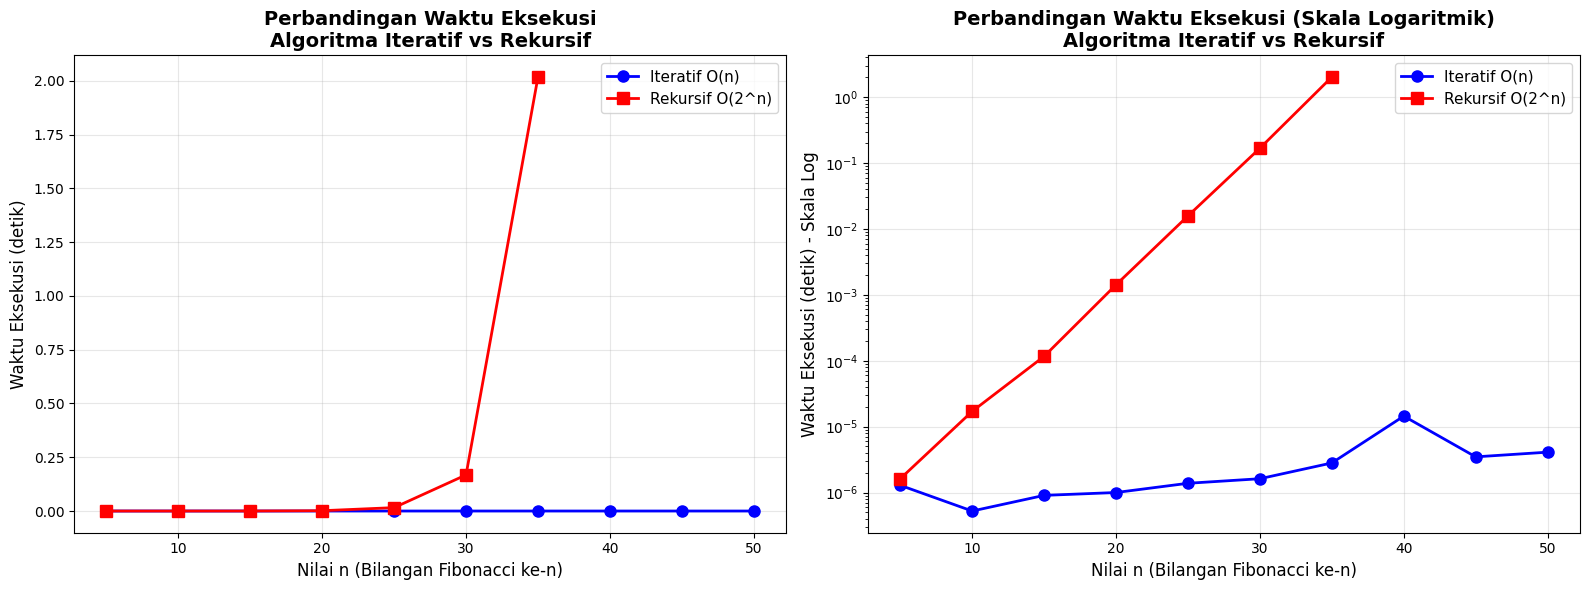


ANALISIS DAN KESIMPULAN

 Untuk n = 30:
   - Waktu Iteratif  : 0.000002 detik
   - Waktu Rekursif  : 0.167883 detik
   - Algoritma rekursif 103552x LEBIH LAMBAT dari iteratif!

 KOMPLEKSITAS WAKTU:
   • Algoritma Iteratif : O(n) - Linear
   • Algoritma Rekursif : O(2^n) - Eksponensial

 TEMUAN:
   1. Algoritma iteratif jauh lebih efisien untuk semua nilai n
   2. Algoritma rekursif menjadi sangat lambat untuk n > 30
   3. Perbedaan waktu meningkat eksponensial seiring bertambahnya n
   4. Rekursif murni tidak praktis untuk nilai n besar

 REKOMENDASI:
   • Gunakan algoritma ITERATIF untuk perhitungan Fibonacci
   • Jika ingin menggunakan rekursif, implementasikan dengan memoization
   • Untuk aplikasi real-world, iteratif adalah pilihan terbaik


In [ ]:
# ========== PROGRAM UTAMA ==========

def main():

    print("\n")
    print("╔" + "=" * 68 + "╗")
    print("║" + " " * 68 + "║")
    print("║" + "  ANALISIS EFISIENSI ALGORITMA FIBONACCI".center(68) + "║")
    print("║" + "  Iteratif vs Rekursif".center(68) + "║")
    print("║" + " " * 68 + "║")
    print("╚" + "=" * 68 + "╝")
    print()

    # Daftar nilai n yang akan diuji
    # Untuk rekursif, dibatasi sampai 35 karena akan sangat lambat
    nilai_n = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

    print(f"Nilai n yang akan diuji: {nilai_n}")
    print(f"Algoritma rekursif hanya diuji sampai n=35")
    print()

    # Jalankan analisis
    data = bandingkan_algoritma(nilai_n)

    # Tampilkan hasil
    tampilkan_tabel(data)
    buat_grafik(data)
    tampilkan_analisis(data)

# Jalankan program
if __name__ == "__main__":
    main()